# Writing Segmented Reference Profiles and Updating the Monitor Configuration accordingly



In [3]:
# Note: you may need to restart the kernel to use updated packages.
%pip install -U -q 'whylogs[datasets]'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 403.0/403.0 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.3/547.3 kB 14.6 MB/s eta 0:00:00


## ✔️ Setting the Environment Variables


In [4]:
import getpass
import os

# set your org-id here - should be something like "org-xxxx"
print("Enter your WhyLabs Org ID")
os.environ["WHYLABS_DEFAULT_ORG_ID"] = "org-qEZQUE"

# set your datased_id (or model_id) here - should be something like "model-xxxx"
print("Enter your WhyLabs Dataset ID")
os.environ["WHYLABS_DEFAULT_DATASET_ID"] = "model-31"

# set your API key here
print("Enter your WhyLabs API key")
os.environ["WHYLABS_API_KEY"] = getpass.getpass()

print("Using API Key ID: ", os.environ["WHYLABS_API_KEY"][0:10])

Enter your WhyLabs Org ID
Enter your WhyLabs Dataset ID
Enter your WhyLabs API key
··········
Using API Key ID:  iSnmQQOV6g


## Fetching the Data
For demonstration, let's use data for transactions from a small retail business:

In [5]:
import pandas as pd

csv_url = "https://whylabs-public.s3.us-west-2.amazonaws.com/datasets/tour/current.csv"
df = pd.read_csv(csv_url)

df.head()

,Transaction ID,Customer ID,Quantity,Item Price,Total Tax,Total Amount,Store Type,Product Category,Product Subcategory,Gender,Transaction Type,Age
0,T14259136777,C274477,1,148.9,15.6345,164.5345,TeleShop,Electronics,Audio and video,F,Purchase,37.0
1,T7313351894,C267568,4,48.1,20.2020,212.6020,Flagship store,Home and kitchen,Furnishing,M,Purchase,25.0
2,T37745642681,C267098,1,10.9,1.1445,12.0445,Flagship store,Footwear,Mens,F,Purchase,42.0
3,T13861409908,C271608,2,135.2,28.3920,298.7920,MBR,Footwear,Mens,F,Purchase,43.0
4,T58956348529,C272484,4,144.3,60.6060,637.8060,TeleShop,Clothing,Mens,F,Purchase,39.0



## Defining segments

TO DO: specify the column to segment the data on.

In [6]:
df["Store Type"].value_counts()

e-Shop            392
TeleShop          206
Flagship store    175
MBR               172
Name: Store Type, dtype: int64

In [7]:
segmentation_colum = "Store Type"

In [8]:
from whylogs.core.segmentation_partition import segment_on_column

column_segments = segment_on_column(segmentation_colum)

## 📊 Profiling the Data

Let's profile the data with whylogs:

In [9]:
import whylogs as why
from whylogs.core.schema import DatasetSchema
from datetime import datetime, timezone

current_date = datetime.now(timezone.utc)
results = why.log(df, schema=DatasetSchema(segments=column_segments))

In [10]:
results

In [11]:
results.count

4

In [12]:
first_segment = results.segments()[0]
segmented_profile = results.profile(first_segment)
print("Profile view for segment {}".format(first_segment.key))
segmented_profile.view().to_pandas()

Profile view for segment ('Flagship store',)


,cardinality/est,cardinality/lower_1,cardinality/upper_1,counts/inf,counts/n,counts/nan,counts/null,distribution/max,distribution/mean,distribution/median,...,type,types/boolean,types/fractional,types/integral,types/object,types/string,types/tensor,frequent_items/frequent_strings,ints/max,ints/min
column,,,,,,,,,,,,,,,,,,,,,
Age,24.000001,24.0,24.001200,0,175,0,0,43.00,30.754286,29.000,...,SummaryType.COLUMN,0,175,0,0,0,0,NaN,NaN,NaN
Customer ID,171.000072,171.0,171.008610,0,175,0,0,NaN,0.000000,NaN,...,SummaryType.COLUMN,0,0,0,0,175,0,"[FrequentItem(value='C270833', est=2, upper=2,...",NaN,NaN
Gender,2.000000,2.0,2.000100,0,175,0,0,NaN,0.000000,NaN,...,SummaryType.COLUMN,0,0,0,0,175,0,"[FrequentItem(value='F', est=91, upper=91, low...",NaN,NaN
Item Price,165.000067,165.0,165.008306,0,175,0,0,150.00,80.862286,81.800,...,SummaryType.COLUMN,0,175,0,0,0,0,NaN,NaN,NaN
Product Category,6.000000,6.0,6.000300,0,175,0,0,NaN,0.000000,NaN,...,SummaryType.COLUMN,0,0,0,0,175,0,"[FrequentItem(value='Books', est=42, upper=42,...",NaN,NaN
Product Subcategory,18.000001,18.0,18.000899,0,175,0,0,NaN,0.000000,NaN,...,SummaryType.COLUMN,0,0,0,0,175,0,"[FrequentItem(value='Mens', est=23, upper=23, ...",NaN,NaN
Quantity,10.000000,10.0,10.000500,0,175,0,0,5.00,2.291429,3.000,...,SummaryType.COLUMN,0,0,175,0,0,0,"[FrequentItem(value='2', est=35, upper=35, low...",5.0,-5.0
Store Type,1.000000,1.0,1.000050,0,175,0,0,NaN,0.000000,NaN,...,SummaryType.COLUMN,0,0,0,0,175,0,"[FrequentItem(value='Flagship store', est=175,...",NaN,NaN
Total Amount,170.000071,170.0,170.008559,0,175,0,0,806.65,193.382577,170.612,...,SummaryType.COLUMN,0,175,0,0,0,0,NaN,NaN,NaN


In [13]:
results.writer("whylabs").write()

[(True, 'log-KlspvLlcqteVgyCh'),
 (True, 'log-Hgyrqs10zJdZRt4h'),
 (True, 'log-rAmkFaH4TbXds0mU'),
 (True, 'log-nc4AEp280Or0yzTk')]

## 🖊 Writing the Reference Profile to WhyLabs

Defining the Reference Profile name:

In [18]:
reference_profile_name = "accepted_values_v3"

In [19]:
from whylogs.api.writer.whylabs import WhyLabsWriter

results.writer("whylabs").option(reference_profile_name=reference_profile_name).write()

[(True, 'accepted_values_v3')]

## Creating or updating the monitor to use the new Reference Profile as a baseline

---



Note: if a monitor with the specified name doesn't exist in the given project, it will be created.

In [20]:
monitor_name = "frequent-items-validator"

In [21]:
!pip install -qq whylabs-toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.2 MB/s eta 0:00:00


In [22]:
os.environ["ORG_ID"] = os.environ["WHYLABS_DEFAULT_ORG_ID"]
os.environ["DATASET_ID"] = os.environ["WHYLABS_DEFAULT_DATASET_ID"]

In [23]:
from whylabs_toolkit.monitor import MonitorSetup, MonitorManager
from whylabs_toolkit.monitor.models import *

In [24]:
monitor_setup = MonitorSetup(
    monitor_id=monitor_name

)

In [25]:
monitor_setup.config is None

True

### Notification action settings

In case this monitor is created from scratch, we should specify the preferred notification action. Here we're configuring a PagerDuty action, so we'll need to pass the [service integration key](https://support.pagerduty.com/docs/services-and-integrations) and an arbitrary ID that we'd like to assign to this new action.

Read more in our [documentation](https://docs.whylabs.ai/docs/whylabs-notifications#pagerduty-notifications).

In [26]:
os.environ["WHYLABS_PAGERDUTY_KEY"] = getpass.getpass() # TO DO: pass the PagerDuty service integration key

··········


### Updating/creating the monitor

In [27]:
if monitor_setup.config:
    print(f"Updating monitor {monitor_name}" in {os.environ['DATASET_ID']})
    monitor_setup.config.baseline=ReferenceProfileId(profileId=reference_profile_name)
else:
    print(f"Creating monitor {monitor_name} in {os.environ['DATASET_ID']}")
    monitor_setup.config = FrequentStringComparisonConfig(
        metric=ComplexMetrics.frequent_items,
        operator=FrequentStringComparisonOperator.baseline_includes_all_target,
        baseline=ReferenceProfileId(profileId=reference_profile_name)
      )
    monitor_setup.actions = [PagerDuty(id="my_pagerduty_action", destination=os.getenv("WHYLABS_PAGERDUTY_KEY"))]


Creating monitor frequent-items-validator in model-31


In [28]:
monitor_setup.config

FrequentStringComparisonConfig(schemaVersion=None, params=None, metric=<ComplexMetrics.frequent_items: 'frequent_items'>, type=<AlgorithmType.frequent_string_comparison: 'frequent_string_comparison'>, operator=<FrequentStringComparisonOperator.baseline_includes_all_target: 'baseline_includes_all_target'>, baseline=ReferenceProfileId(datasetId=None, type=<BaselineType.Reference: 'Reference'>, profileId='accepted_values_v3'))

In [29]:
monitor_setup.apply()


### Persisting changes

In [30]:
manager = MonitorManager(
    setup=monitor_setup
)


In [31]:
manager.validate()

True

### Validation

You can take a look at the WhyLabs platform now to check if the applied changes can be seen there.

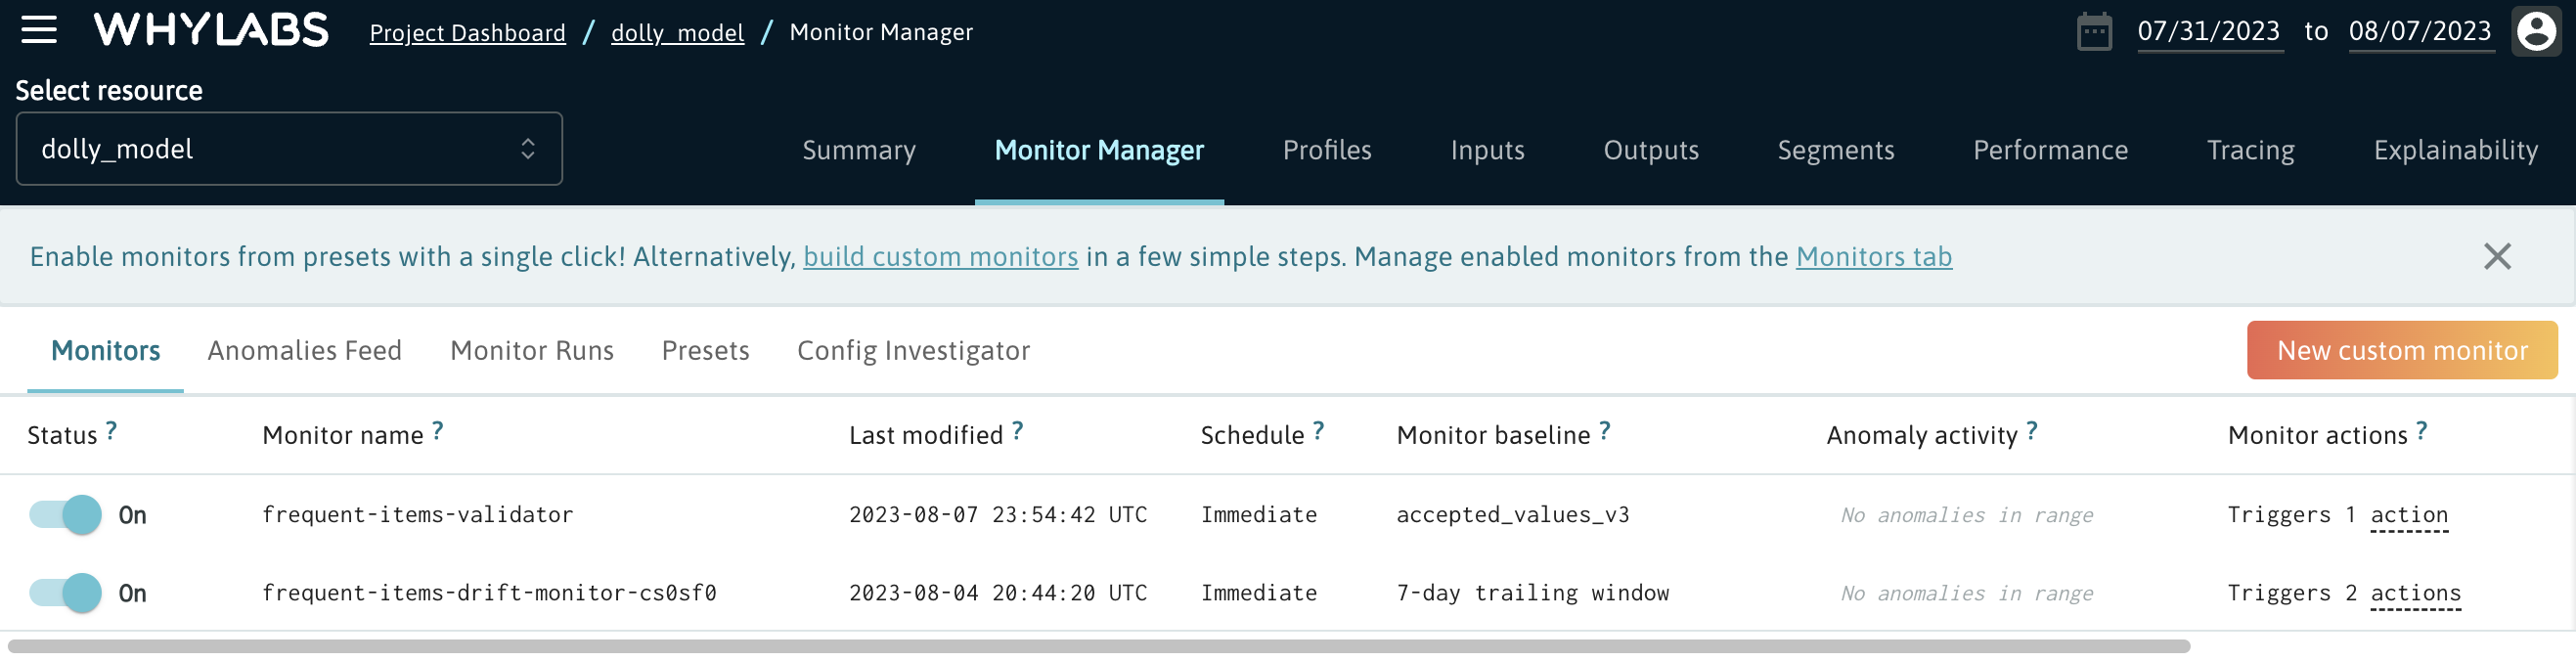